<br>

# Text Analysis

<br>

## Business Motivation: What really inspires us?

<br>

Hey! <br>
In this notebook you can find text analysis of a very popular business motivation book. You have probably heard about Robert Kiyosaki and his famous "Rich Dad Poor Dad". The goal is to understand the "power" of this book, the context and much more. We will also compare our findings with some other literature. This analysis contains NLP techniques so first of all we need to install nltk which is used for natural language processing.

In [2]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import wordcloud

import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.book import *
from nltk.text import Text 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Now let's import the books that we are going to analyze. The main book "Rich Dad Poor Dad" is imported from the PC, later I'll also use Project Gutenberg online library and it's package in python.

In [3]:
a = open("D:\\Python\\rich.txt","r")
b = open("D:\\Python\\gen.txt","r")
business = a.read()
novel= b.read()

Here's a function to calculate the average length of sentences in text. We need to tokenize sentences for further analysis.

In [4]:
def SentencesTokenized(text):
    tokenizer = nltk.sent_tokenize(text)
    return tokenizer

def SentenceLength(SentencesTokenized):
    average_s = sum(len(i) for i in SentencesTokenized) / len(SentencesTokenized)
    print("The average length of sentences in this book is ", average_s)

print("Rich Dad Poor Dad")
a=SentencesTokenized(business)
SentenceLength(a)
print("Genius")
b=SentencesTokenized(novel)
SentenceLength(b)

Rich Dad Poor Dad
The average length of sentences in this book is  80.6109947643979
Genius
The average length of sentences in this book is  77.13165487714073


The next step is word tokenization. We also need to make some other changes to prepare the text for analysis.

In [5]:
businesslower = business.lower()
novellower = novel.lower()

In [6]:
def WordsTokenized(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(text)
    return new_words
    
def WordLength(WordsTokenized):
    print("There are ", len(WordsTokenized), " words in the text.")
    average_w = sum(len(i) for i in WordsTokenized) / len(WordsTokenized)
    print("The average length of words is", average_w, ".")

print("Rich Dad Poor Dad")
c=WordsTokenized(businesslower)
WordLength(c)
print("Genius")
d=WordsTokenized(novellower)
WordLength(d)

Rich Dad Poor Dad
There are  58407  words in the text.
The average length of words is 4.180372215659082 .
Genius
There are  311800  words in the text.
The average length of words is 4.2079217447081465 .


The next code is essential but it is running slow, so please wait for it's execution :)

In [7]:
def cleaning(WordsTokenized):   
    tokens_without_sw = [i for i in WordsTokenized if not i in stopwords.words()]
    return tokens_without_sw

e = cleaning(c)
f = cleaning(d)

In [93]:
bus_proportion = len(e) / len(c)
print((1-bus_proportion), " is the proportion of stopwords in the business book.")
nov_proportion = len(f) /len(d)
print((1-nov_proportion), " is the proportion of stopwords in novel.")

0.524509048572945  is the proportion of stopwords in the business book.
0.5615586914688904  is the proportion of stopwords in novel.


Now we have a simpler version of the text, let's see the frequency of words. That can be best visualized with word cloud. We will run this on a different version of our texts as it takes forever to generate a wordcloud in a different way.


In [84]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

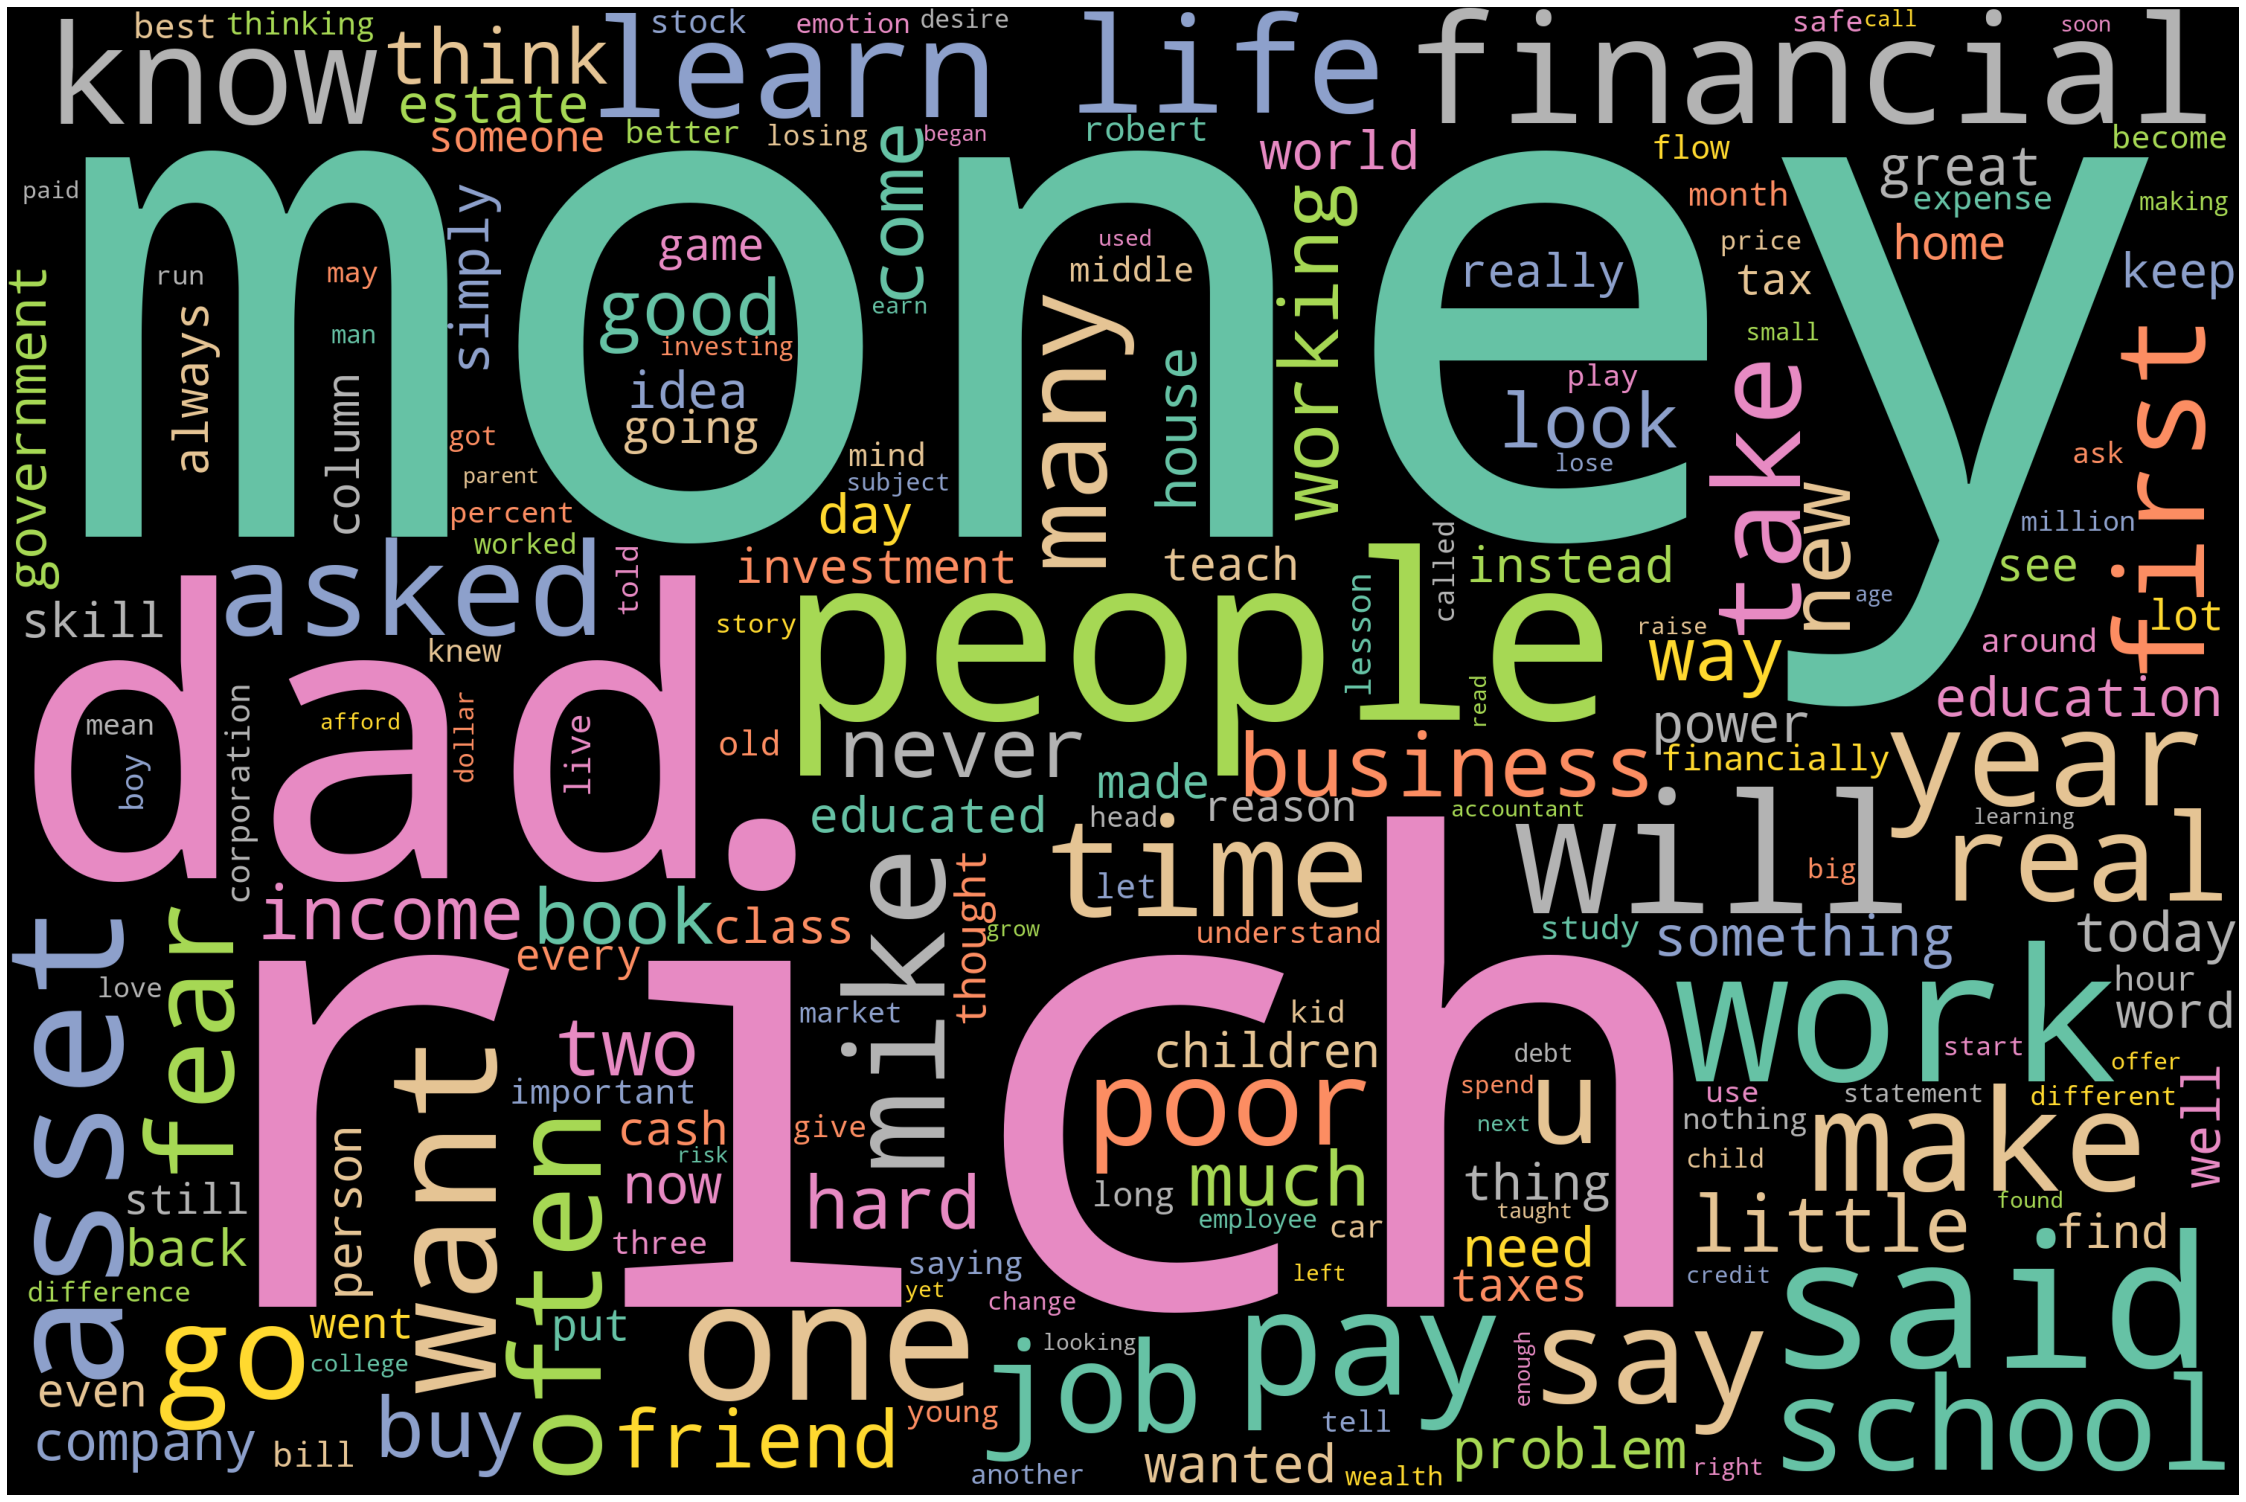

In [85]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(businesslower)

plot_cloud(wordcloud)

wordcloud.to_file("wordcloud.png")

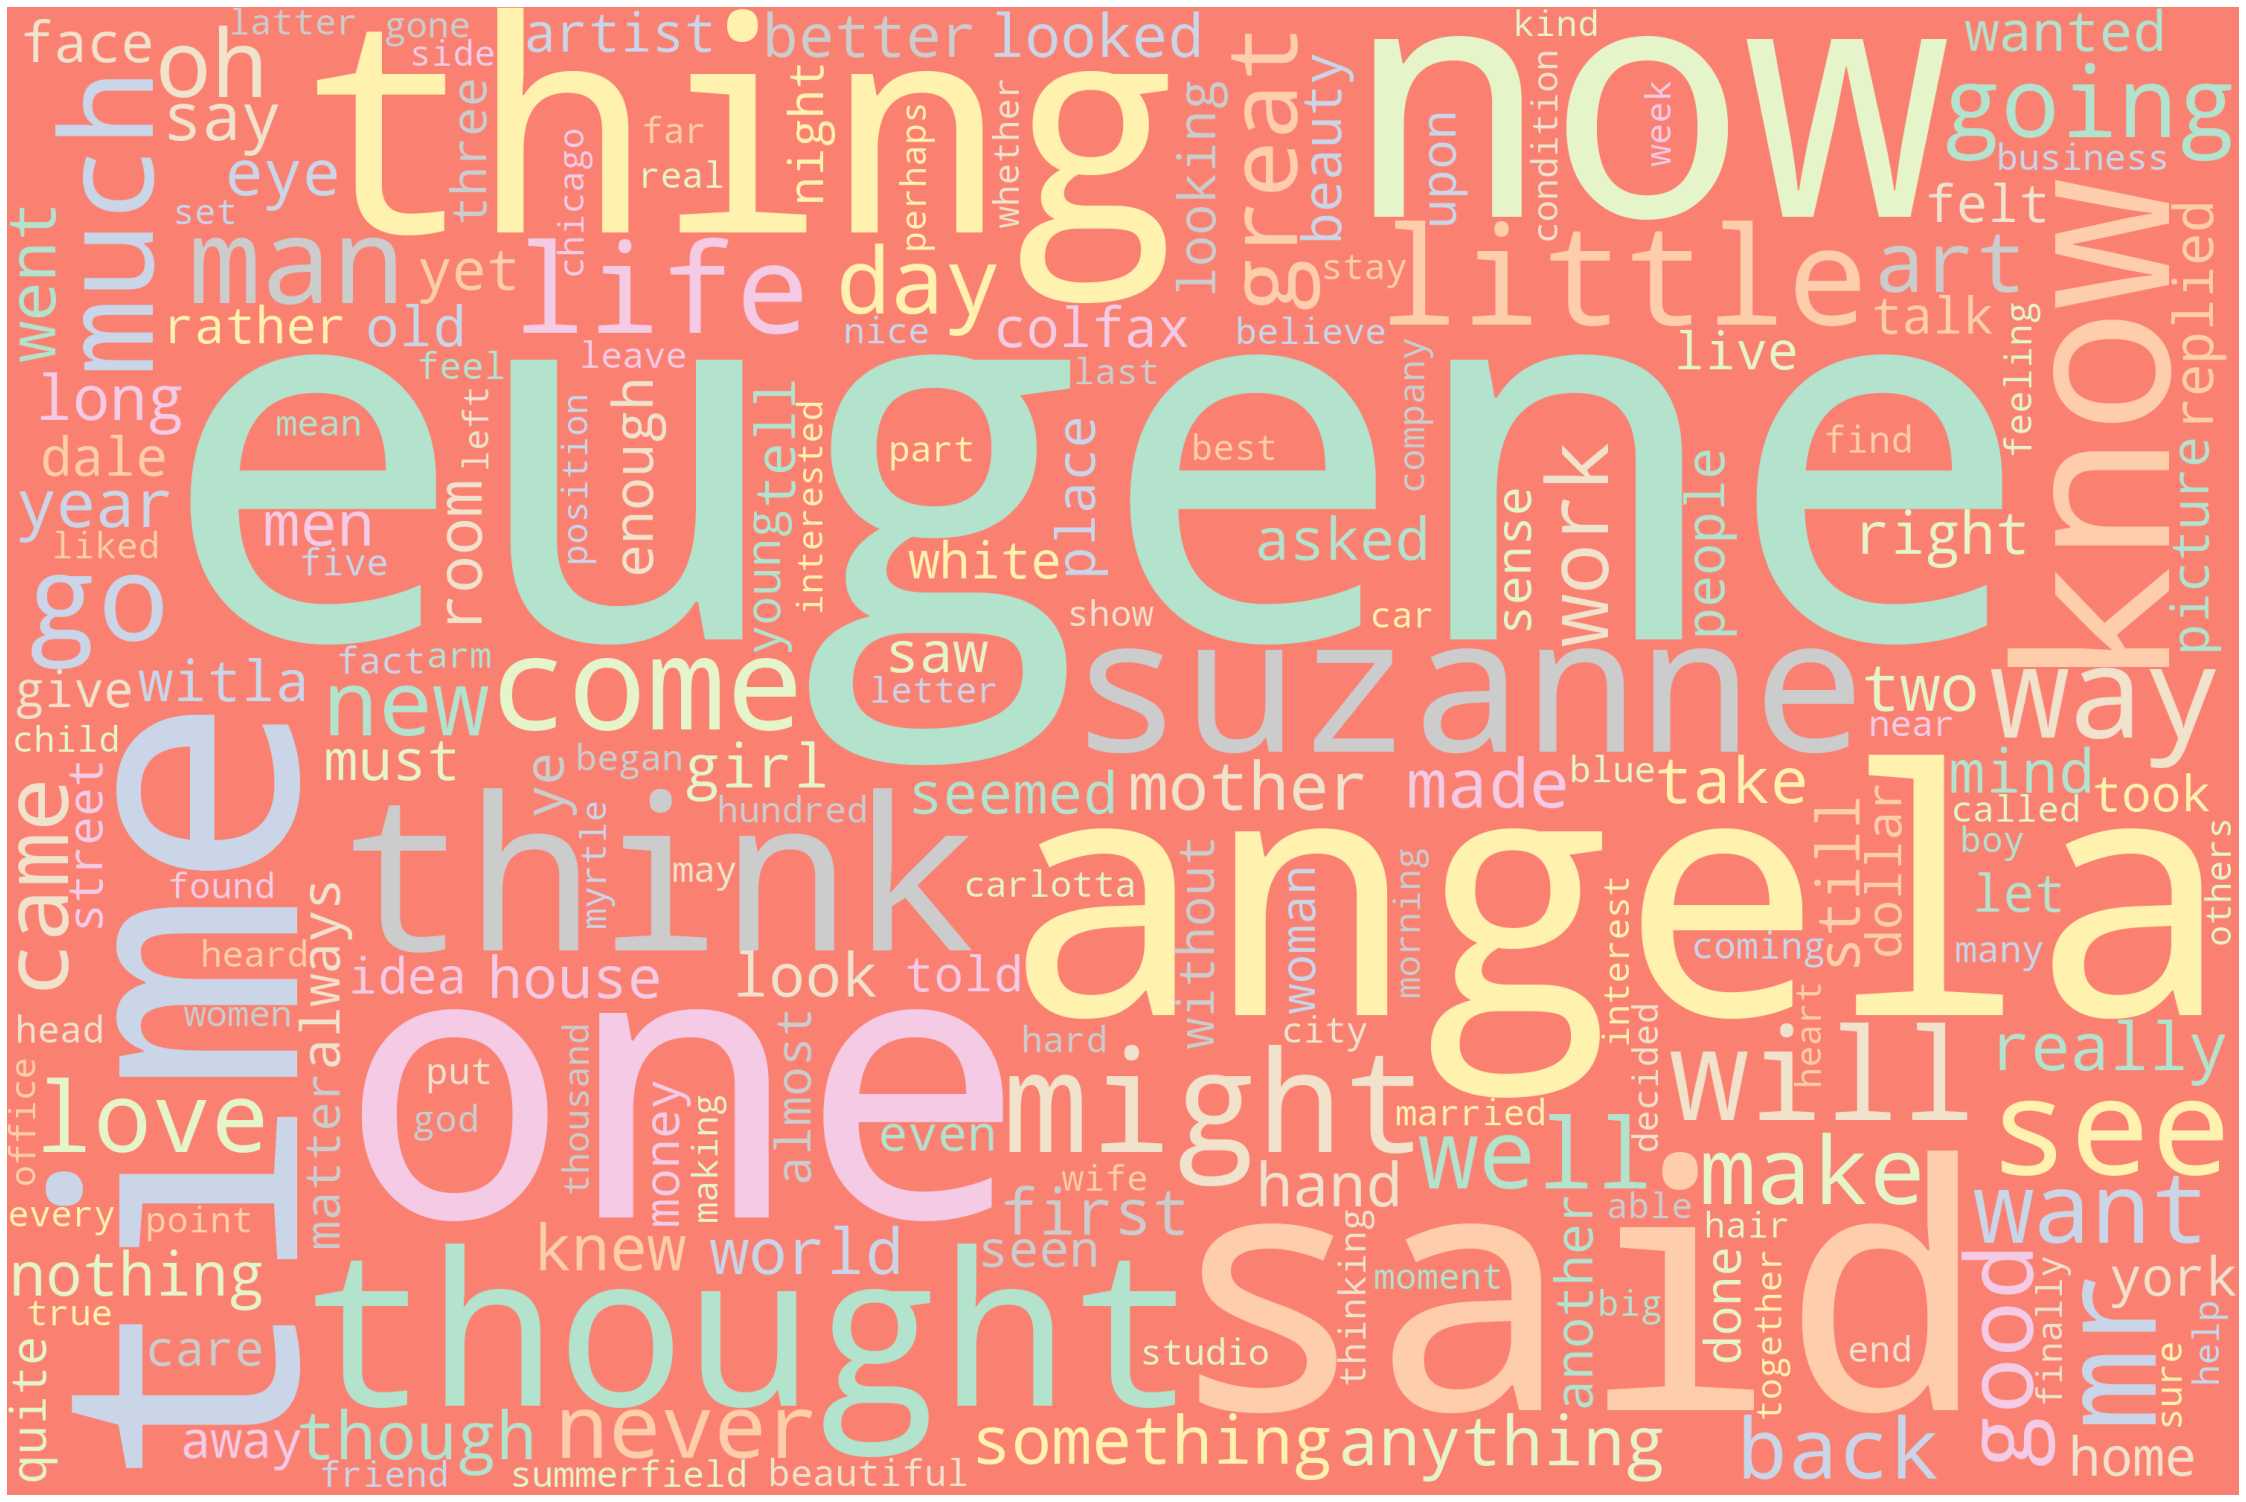

In [87]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel2', collocations=False, stopwords = STOPWORDS).generate(novellower)

plot_cloud(wordcloud)

In [12]:
def Content_Word(name,word, path):
    print("\n")
    print(name)
    text = Text(nltk.corpus.gutenberg.words(path))
    text.concordance(word,100)
    
Content_Word("Rich Dad Poor Dad", "money", "D:\\Python\\rich.txt")
Content_Word("Genius", "money", "D:\\Python\\gen.txt")
Content_Word("Bible", "money", "bible-kjv.txt")



Rich Dad Poor Dad
Displaying 25 of 485 matches:
 as hard as you and dad do . You make a lot of money , and we live in a huge house with lots of toy
 at doctors . They don ' t make nearly as much money as they used to . I know I can ' t rely on Soc
h school , yet they have never had a course in money or how to invest it , let alone understand how
ut financial literacy and the knowledge of how money works , they are not prepared to face the worl
ernment . Generally , the child begins to make money , credit cards start to arrive in mass , and t
ping begins , if it already hasn ' t ." Having money to burn , the child goes to places where other
 more specialized skills so they can earn more money . Maybe they take a second job . Their incomes
 their large paycheck and wonder where all the money went . They buy some mutual funds and buy groc
safe job or career .' They learn nothing about money , except from those who profit from their naÃ 
ning ," she said . " I learned a lot about how mon

In a Linkedin discussion that I opened, one of my friends said that it was the idea of "paying yourself first" that made her rethink her lifestyle. Let's check whether we can meet this expression frequently in the book.

In [17]:
Content_Word("Rich Dad Poor Dad", "yourself", "D:\\Python\\rich.txt")



Rich Dad Poor Dad
Displaying 25 of 34 matches:
w do you teach investing when as a parent you yourself are risk averse ? Instead of teaching my chil
 unemployed , you have the ability to educate yourself and teach those you love to take care of them
ing it safe , doing the right things , saving yourself for some event that never happens . Then , yo
at you ' re the problem , then you can change yourself , learn something and grow wiser . Most peopl
s . Let me tell you , it ' s easier to change yourself than everyone else ."" I don ' t understand ,
 don ' t have to say it to anyone else . Just yourself ."" You mean the people in this park , the pe
mind and emotions in your favor , not against yourself ."" Whoa !" said Mike ." Don ' t worry about 
t a job will make you feel secure is lying to yourself . That ' s cruel , and that ' s the trap I wa
ou . Thinking would be taking the time to ask yourself a question . A question like , ` Is working h
to people in debt ." If you find you have 

In [19]:
bus = Text(nltk.corpus.gutenberg.words("D:\\Python\\rich.txt"))
nov = Text(nltk.corpus.gutenberg.words("D:\\Python\\gen.txt"))
bib = Text(nltk.corpus.gutenberg.words("bible-kjv.txt"))
books = [bus, nov, bib]

In [34]:
bus.common_contexts(["yourself"],3)

pay_first ask_is you_are


In [21]:
for i in books:
    i.similar("money",30)
    print("\n")

it you me that fear them time rich what game world education people us
there life pay taxes him assets and work how government problem power
school because more course


time way work that things life her and day it one house more place him
man difference angela child eugene world girls thing beauty men art
company car but kind


god man them people life lord men me hand fire it land thee bread
house good him spirit water father way heart glory you flesh children
sword son joy day




In [23]:
for i in books:
    i.similar("yourself",30)
    print("\n")

for work do money him learn school study you say me have success
because people us want new think what mike start buy years investing
myself discuss see perform stay


it me him her himself you that this the what herself and there so
beauty oh think anything seven angela suzanne i when life not but well
eugene something come


No matches




In [24]:
for i in books:
    i.similar("rich")
    print("\n")

poor money world my government other game market more company
corporation problem reason fear numbers words young assets price book


true great old work fine city one house new young well little man
conservative much hard bad white nice world


wise poor great mighty dead strong righteous left desolate good lord
king old first god not wicked one young perfect




In [36]:
for i in books:
    i.common_contexts(["rich"],10)
    print("\n")

my_dad said_dad be_and the_don asked_dad the_the a_man the_get be_you
the_know


the_and sense_thomas be_so be_anybody s_in a_contralto tremendously_he
the_families newly_middle all_new


the_man a_man the_in the_men certain_man the_shall maketh_he am_and
be_and very_in




Let's also determine the location of some particular words in the text. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text.

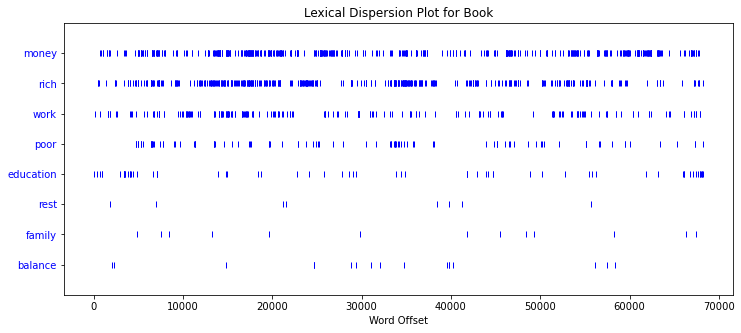

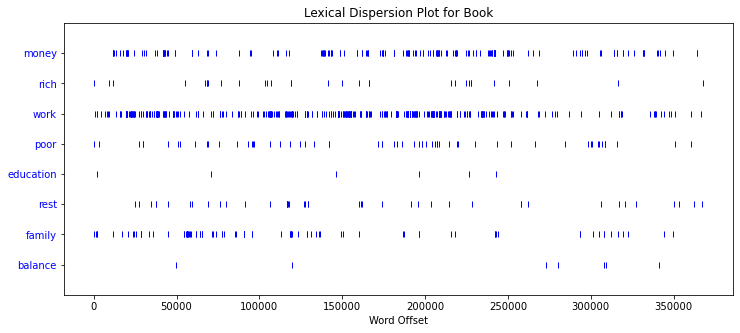

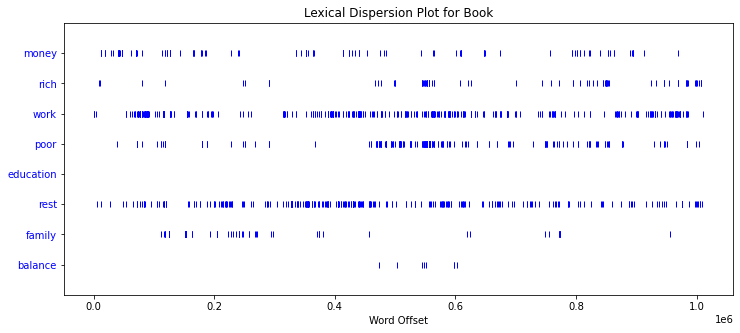

In [64]:
for i in books:
    book=Text(i)
    plt.figure(figsize=(12, 5))
    targets=["money", "rich", "work", "poor", "education", "rest", "family", "balance"]
    dispersion_plot(book, targets, ignore_case=True, title="Lexical Dispersion Plot for Book")

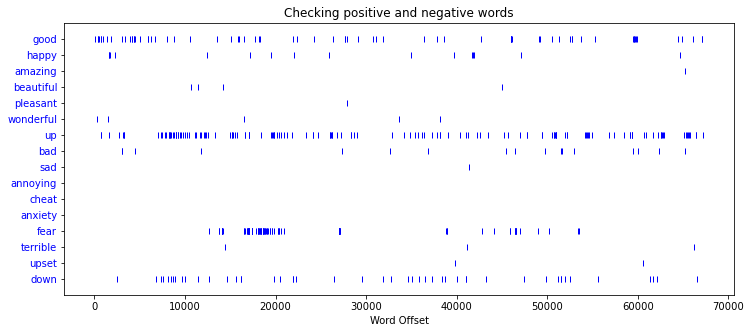

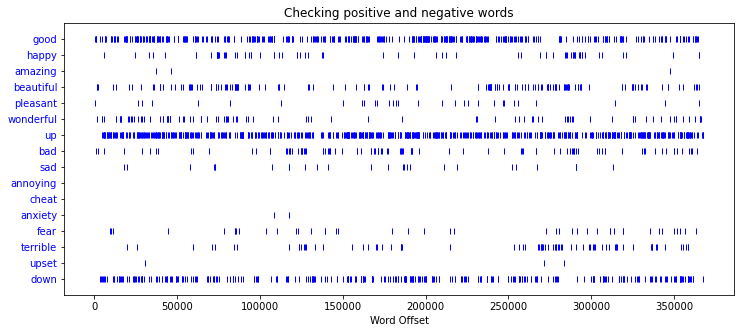

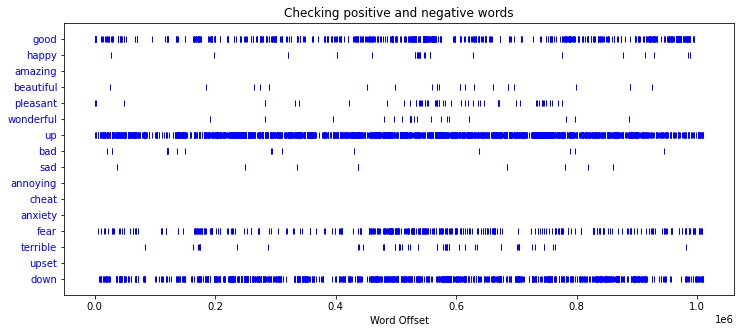

In [89]:
for i in books:
    book=Text(i)
    plt.figure(figsize=(12, 5))
    targets=["good","happy","amazing","beautiful","pleasant","wonderful","up","bad", "sad","annoying","cheat","anxiety","fear","terrible","upset","down"]
    dispersion_plot(book, targets, ignore_case=True, title="Checking positive and negative words")

In [88]:
for i in books:
    i.collocations()
    print("\n")

rich dad; real estate; middle class; cash flow; asset column; Rich
dad; Rat Race; Social Security; financial intelligence; educated dad;
said rich; rat race; Robin Hood; would say; highly educated; balance
sheet; everyone else; good grades; mutual fund; Peter Lynch


New York; thousand dollars; Christian Science; Magazines Corporation;
United Magazines; said Eugene; hundred dollars; Christina Channing;
great deal; Miriam Finch; Fifth Avenue; Norma Whitmore; Big John; Blue
Sea; could see; two hundred; art director; one day; Flower Face; came
back


said unto; thou shalt; thou hast; Lord GOD; Thus saith; every one; say
unto; Thou shalt; burnt offering; every man; Jesus Christ; thou art;
unto thee; shall come; spake unto; right hand; Holy Ghost; years old;
pray thee; thus saith




Calculating the frequency of words in the text. We will use the text version where we deleted stopwords, it will be more insightful.

<FreqDist with 4606 samples and 27772 outcomes>
    money      rich    people       dad      said      work       get     would financial       pay 
      485       399       366       361       218       195       192       182       155       140 


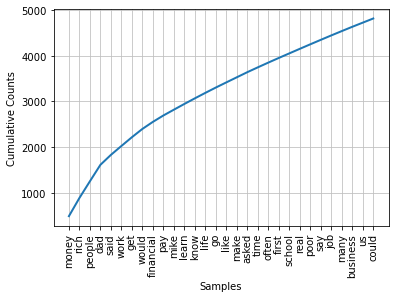

<FreqDist with 13417 samples and 136706 outcomes>
 eugene   would   could  angela    said    time   think suzanne   might    know 
   2295    1858    1381     971     968     761     721     718     717     706 


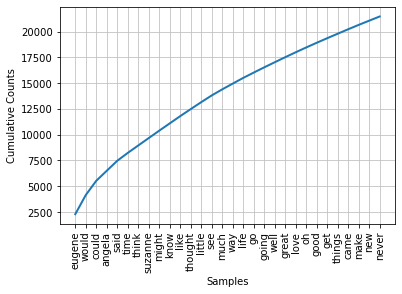

In [73]:
filteredtext=[e,f]

def Frequency(text):
    fdist = FreqDist(text)
    print(fdist)
    b = fdist.tabulate(10)
    fdist.plot(30, cumulative=True)

for i in filteredtext:
    Frequency(i)

In [96]:
def Word_Info(text):
    num=len(set(text))
    denom=len(text)
    result=num/denom
    print("The number of words in the text is", denom, 
          ",pay attention that we deleted stopwords. The number of distinct words is", num,
          " ,which is", result, " of total words.")

for i in filteredtext:
    Word_Info(i)
    print("\n")

The number of words in the text is 27772 ,pay attention that we deleted stopwords. The number of distinct words is 4606  ,which is 0.1658504969033559  of total words.


The number of words in the text is 136706 ,pay attention that we deleted stopwords. The number of distinct words is 13417  ,which is 0.09814492414378301  of total words.




Conclusion: <br>
Motivation is the fuel that helps you to achieve your goals. Motivational books or speeches create a positive and optimistic impact on your life. They boost your confidence and help in developing a positive outlook towards life.  <br>
But why did this particular book become one of the most popular "motivation" books? Does it teach any new techniques to achieve your goals? Does it contain any psychological suggestions,or many positive words? As you saw in this notebook, we have a different picture here. It's mainly about finance, getting rich, money. That's one of the reasons that made this book to stand out from the croud.